# Prep

Setting up some prior functionality

In [24]:
import pandas as pd
import numpy as np
import os

# Load results confusion matrix csv 

In [25]:
#Starting from the location where data is stored
results_dir = os.path.abspath("results/85_thresh")
csv_f = os.path.join(results_dir, "train/results_summary.csv")
# csv_f = os.path.join(results_dir, "val/results_summary.csv")
# csv_f = os.path.join(results_dir, "test/results_summary.csv")
if os.path.exists(csv_f):
    res_df = pd.read_csv(csv_f)
else:
    print("File does not exist :: ", csv_f)

In [26]:
res_df

image_id  Turtles correctly found  Turtles not found  \
0    IMG_4099                        1                  1   
1    IMG_4281                        1                  0   
2    IMG_4214                        0                  0   
3    IMG_4128                        0                  0   
4    IMG_4319                        3                  1   
..        ...                      ...                ...   
143  IMG_4015                        5                  0   
144  IMG_4228                        3                  1   
145  IMG_4136                        1                  1   
146  IMG_4269                        0                  0   
147  IMG_4282                        1                  1   

     Incorrectly detected as Turtle  
0                                 4  
1                                 0  
2                                 0  
3                                 0  
4                                 3  
..                              ...  
143                               0  
144                               2  
145                               0  
146                               0  
147                               3  

[148 rows x 4 columns]

In [27]:
res_df.describe()

Turtles correctly found  Turtles not found  \
count               148.000000         148.000000   
mean                  4.668919           0.777027   
std                   5.598091           1.216781   
min                   0.000000           0.000000   
25%                   1.000000           0.000000   
50%                   3.000000           0.000000   
75%                   6.000000           1.000000   
max                  32.000000          10.000000   

       Incorrectly detected as Turtle  
count                      148.000000  
mean                         1.702703  
std                          2.055222  
min                          0.000000  
25%                          0.000000  
50%                          1.000000  
75%                          3.000000  
max                         10.000000

In [28]:
res_df.sum()

image_id                          IMG_4099IMG_4281IMG_4214IMG_4128IMG_4319IMG_43...
Turtles correctly found                                                         691
Turtles not found                                                               115
Incorrectly detected as Turtle                                                  252
dtype: object

## Confusion matrix

In [29]:
tp = res_df.sum()[1]
fn = res_df.sum()[2]
fp = res_df.sum()[3]

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
cm = np.array([[tp, fn], [fp, 0]])

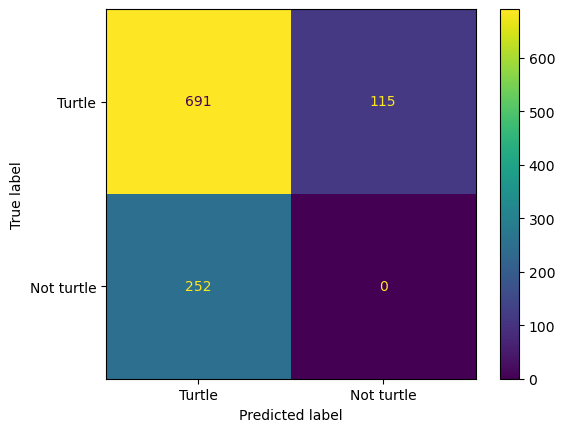

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Turtle', 'Not turtle'])
disp.plot()

### **Recall** in this context is also the *True positive rate* or *Sensitivity*, 
----> This is quantitative measure. One interpretion: How likely is that most of the relevant results are returned (even if there are irrelevant predictions). Higher the recall, more turtles are detected (even if there are more incorrect predictions of things that are not turtles). 

In worst case scenario, nothing is detected as a turtle.  Recall is zero
In best case scenario, all turtles are detected, and no mistakes are made. Recall is 1.

### **Precision** is also the *Positive predictive value* (PPV); 
 ----> This is qualitative measure. One interpretion: How likely is that the model predictions are relevant. Higher the precision, more the likelihood that the results are relevant. In other words, Higher precision would mean, most of the predictions of Turtles, are actually turtles. If other things are getting detected as turtles, the precision goes down. 
 
 Worst case scenario: All objects detected as turtles are not turtles, and no turtles were actually detected. Precision becomes zero.
 
 Best case scenario: All turtles that are detected are actully turtles and no object was mistakenly detected as a turtle. Precision is 1
 
 #### In best scenario, both precision and recall are 1.  Usually one needs to find a balance bnetween the two.
 
 ### F1-measure combines the two metrics

In [33]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)

In [34]:
print(precision, recall)

0.7327677624602333 0.8573200992555832


In [35]:
F1 = 2 * (precision * recall) / (precision + recall)

In [36]:
print(F1)

0.7901658090337337
